In [2]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:

y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train=y_train.reshape(-1,)
y_train[0:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
classes=["airplane",'automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [9]:
classes[4]

'deer'

In [10]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

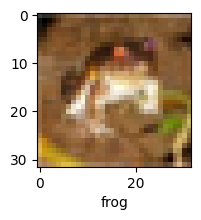

In [11]:
plot_sample(X_train,y_train,0)

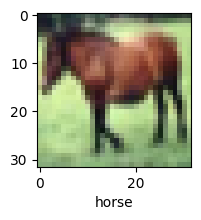

In [12]:
plot_sample(X_train,y_train,7)

In [13]:
X_train=X_train/255
X_test=X_test/255

In [14]:
X_test[0]

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0

In [15]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 19s 9ms/step - loss: 1.8142 - accuracy: 0.3522
Epoch 2/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6248 - accuracy: 0.4259
Epoch 3/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5429 - accuracy: 0.4561
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4837 - accuracy: 0.4744
Epoch 5/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4348 - accuracy: 0.4951


In [16]:
ann.evaluate(X_test,y_test)


313/313 [==============================] - 1s 3ms/step - loss: 1.5163 - accuracy: 0.4593


[1.5162973403930664, 0.4593000113964081]

In [17]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 3ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.53      0.58      0.55      1000
           1       0.69      0.54      0.60      1000
           2       0.24      0.70      0.35      1000
           3       0.39      0.24      0.30      1000
           4       0.56      0.17      0.27      1000
           5       0.52      0.25      0.34      1000
           6       0.50      0.53      0.51      1000
           7       0.52      0.57      0.54      1000
           8       0.61      0.60      0.61      1000
           9       0.67      0.41      0.51      1000

    accuracy                           0.46     10000
   macro avg       0.52      0.46      0.46     10000
weighted avg       0.52      0.46      0.46     10000



In [18]:
#we are going to use CNN

In [20]:
cnn = models.Sequential([
         layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
         layers.MaxPooling2D((2,2)),

         layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
         layers.MaxPooling2D((2,2)),

        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

In [25]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5557 - accuracy: 0.8059
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5237 - accuracy: 0.8154
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4870 - accuracy: 0.8283
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4579 - accuracy: 0.8386
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4305 - accuracy: 0.8474
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4057 - accuracy: 0.8559
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.3740 - accuracy: 0.8672
Epoch 8/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.3551 - accuracy: 0.8746
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3063 - accuracy: 0.8914


In [27]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.3275 - accuracy: 0.6816


[1.3274874687194824, 0.6815999746322632]

In [28]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

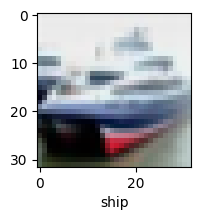

In [29]:
plot_sample(X_test,y_test,1)

In [31]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[3.27072848e-05, 3.55940347e-11, 2.72264651e-06, 9.52879488e-01,
        6.83760817e-08, 4.68022823e-02, 6.40144935e-05, 5.50663856e-07,
        2.18075918e-04, 1.37943053e-08],
       [9.03522141e-06, 8.36816609e-01, 3.01384453e-14, 2.72484704e-12,
        1.32993847e-16, 1.42090834e-13, 2.21493398e-16, 5.94279617e-13,
        1.63173884e-01, 4.22759513e-07],
       [5.13865030e-04, 6.72016293e-04, 1.25009365e-07, 3.28033906e-07,
        6.50804338e-07, 3.14975949e-07, 2.90427704e-09, 3.07237678e-05,
        9.98768866e-01, 1.30810695e-05],
       [2.11738288e-01, 5.36493897e-01, 1.49764237e-03, 2.73697715e-05,
        3.71189640e-06, 1.09131424e-08, 5.71463268e-08, 6.48229616e-07,
        2.43771926e-01, 6.46640686e-03],
       [8.82491875e-08, 9.42779661e-06, 1.25940237e-03, 7.44829234e-03,
        1.47857428e-01, 6.16547791e-03, 8.37236464e-01, 2.36792200e-11,
        2.30604583e-05, 3.58567632e-07]], dtype=float32)

In [33]:
np.argmax(y_pred[1])

1

In [34]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 8, 1, 6]

In [35]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [36]:
print("Classification Report:\n",classification_report(y_test,y_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72      1000
           1       0.82      0.76      0.79      1000
           2       0.56      0.61      0.59      1000
           3       0.50      0.49      0.50      1000
           4       0.67      0.55      0.60      1000
           5       0.59      0.56      0.57      1000
           6       0.79      0.73      0.76      1000
           7       0.70      0.78      0.73      1000
           8       0.73      0.81      0.77      1000
           9       0.74      0.81      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000

